In [1]:
!pip install numpy
!pip install pandas
!pip install transformers


In [2]:
import numpy as np 
import pandas as pd 


df = pd.read_csv('datasetV1Cleaningness.csv')
df.head()

,Summary,Space,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Review Scores Cleanliness
0,Located 15 minutes from downtown in desirable ...,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Charming yet Trendy Retreat- in my 2 bedroom w...,"My home is a town home, so I do have stairs. B...",none,NaN,"The front house is my landlord, who is lovely....",NaN,"Guests are welcome to the kitchen, living room...",I would love to be here to check you in and sh...,"- Please no parties, and loud noise. My home i...",10.0
2,Our 300 sq. feet King rooms feature floor-to-c...,King-sized bed Down comforters and pillows (hy...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1 Bdrm Brownstone, sleeps 2. Steps from KINGST...",Our 100 year old Landmark Brownstone is a HOME...,none,Bedford Stuyvesant is a very culturally divers...,Certain times of the year there are fun and in...,There are trains A or C are five minute walk ...,You will be able acess entire space when i mee...,I will be meeting with you to give you acces t...,NaN,NaN
4,Grab your friends and make this two bedroom Br...,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [3]:

df = df.sample(frac=0.04, random_state=42)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from transformers import BertPreTrainedModel, BertModel, BertTokenizer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import torch

'''
# Check if GPU is available
if torch.cuda.is_available():
    # Set the default tensor type to CUDA tensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.set_default_device(device)'''


/home/bob/anaconda3/envs/newenvn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n# Check if GPU is available\nif torch.cuda.is_available():\n    # Set the default tensor type to CUDA tensor\n    torch.set_default_tensor_type(torch.cuda.FloatTensor)\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\ntorch.set_default_device(device)'

In [5]:
import os
os.environ['TOKENIZERS_PARALLELISM']= "false"

In [6]:
df['SummaryClean']= df['Summary'].map(lambda x : str(x))

In [7]:
len(df.SummaryClean.tolist())

537

In [11]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")
sequence_to_classify = df.SummaryClean.to_numpy()[0]
candidate_labels = ['clean']
classifier(sequence_to_classify, candidate_labels)['scores'][0]

0.6973538398742676

In [12]:
scores = []
with torch.no_grad():
    for i in df.SummaryClean.tolist():
        scores.append(classifier(i, candidate_labels)['scores'][0])


In [13]:
!pip install matplotlib

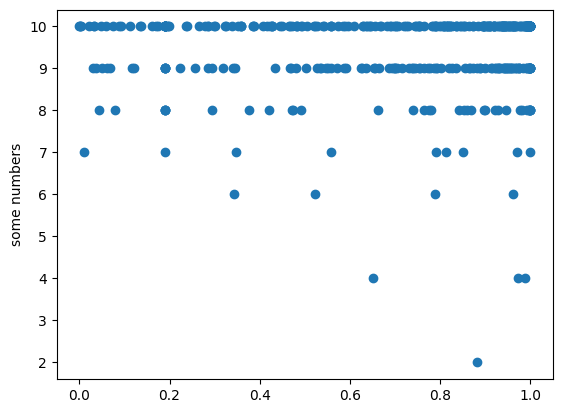

In [14]:
import matplotlib.pyplot as plt

# Create some sample data
x = df['Review Scores Cleanliness'].map(lambda x: float(x))
y_values = list(map(lambda x: float(x),scores))

# Plot the data
plt.scatter(y_values,x)
plt.ylabel('some numbers')  # Add a label to the y-axis
plt.show()  # Display the plot
